<a href="https://colab.research.google.com/github/flubber-lab/Analysis-of-Heart-Attacks-in-Youth-vs.-Adults-in-Indonesia/blob/main/Analysis_of_Heart_Attacks_in_Youth_vs_Adults_in_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00


In [5]:
df = pd.read_csv('/content/heart_attack_indonesia.csv')
df

ID       State  Age HeartAttack  Gender  Cholesterol SmokingHabits  \
0          1   Pekanbaru   32          No    Male          179        Smoker   
1          2    Makassar   15         Yes  Female          201    Non-smoker   
2          3    Surabaya   41          No  Female          167    Non-smoker   
3          4      Malang   31          No    Male          287        Smoker   
4          5        Bali   19          No    Male          239        Smoker   
...      ...         ...  ...         ...     ...          ...           ...   
42686  42687    Semarang   55          No  Female          207    Non-smoker   
42687  42688     Bandung   60          No    Male          161    Non-smoker   
42688  42689  Balikpapan   55         Yes    Male          184        Smoker   
42689  42690    Denpasar   37         Yes  Female          287        Smoker   
42690  42691    Denpasar   44         Yes  Female          214        Smoker   

      PhysicalActivity   BMI Hypertension  ... EducationLevel MaritalStatus  \
0                 High  19.1          Yes  ...      Secondary        Single   
1                 High  26.9           No  ...      Secondary       Married   
2             Moderate  29.6          Yes  ...        Primary        Single   
3             Moderate  19.4           No  ...         Higher        Single   
4                 High  18.5           No  ...      Secondary       Married   
...                ...   ...          ...  ...            ...           ...   
42686              Low  19.7           No  ...        Primary        Single   
42687             High  19.3           No  ...        Primary        Single   
42688         Moderate  33.9          Yes  ...        Primary        Single   
42689         Moderate  22.0          Yes  ...      Secondary        Single   
42690              Low  33.5           No  ...      Secondary       Married   

      FamilyHistoryHeartDisease IncomeLevel HealthcareAccess SleepHours  \
0                            No      Middle             Good        7.9   
1                            No      Middle          Average        8.5   
2                            No      Middle             Poor        7.3   
3                           Yes      Middle             Good        4.8   
4                            No         Low             Poor        6.0   
...                         ...         ...              ...        ...   
42686                        No        High             Good        7.1   
42687                       Yes         Low             Good        6.5   
42688                        No        High             Poor        5.7   
42689                       Yes        High             Poor        7.8   
42690                       Yes      Middle               Po        NaN   

      UrbanOrRural AirQualityIndex PollutionLevel EmploymentStatus  
0            Urban            73.0           High       Unemployed  
1            Urban           266.0       Moderate       Unemployed  
2            Urban           132.0       Moderate         Employed  
3            Rural            64.0           High       Unemployed  
4            Urban           155.0       Moderate       Unemployed  
...            ...             ...            ...              ...  
42686        Rural           162.0           High       Unemployed  
42687        Urban           106.0       Moderate       Unemployed  
42688        Rural           218.0       Moderate         Employed  
42689        Urban           228.0           High         Employed  
42690          NaN             NaN            NaN              NaN  

[42691 rows x 25 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42691 entries, 0 to 42690
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         42691 non-null  int64  
 1   State                      42691 non-null  object 
 2   Age                        42691 non-null  int64  
 3   HeartAttack                42691 non-null  object 
 4   Gender                     42691 non-null  object 
 5   Cholesterol                42691 non-null  int64  
 6   SmokingHabits              42691 non-null  object 
 7   PhysicalActivity           42691 non-null  object 
 8   BMI                        42691 non-null  float64
 9   Hypertension               42691 non-null  object 
 10  Diabetes                   42691 non-null  object 
 11  AlcoholConsumption         28651 non-null  object 
 12  DietType                   42691 non-null  object 
 13  OccupationType             42691 non-null  obj

In [7]:
df.isnull().sum()

ID                               0
State                            0
Age                              0
HeartAttack                      0
Gender                           0
Cholesterol                      0
SmokingHabits                    0
PhysicalActivity                 0
BMI                              0
Hypertension                     0
Diabetes                         0
AlcoholConsumption           14040
DietType                         0
OccupationType                   0
StressLevel                      0
EducationLevel                   0
MaritalStatus                    0
FamilyHistoryHeartDisease        0
IncomeLevel                      0
HealthcareAccess                 0
SleepHours                       1
UrbanOrRural                     1
AirQualityIndex                  1
PollutionLevel                   1
EmploymentStatus                 1
dtype: int64

In [8]:
df['AlcoholConsumption'].value_counts()

AlcoholConsumption
Often     14380
Rarely    14271
Name: count, dtype: int64

In [9]:
df['AlcoholConsumption'].fillna('Non', inplace=True)

<ipython-input-9-b9e5a4c6f428>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [10]:
df['AlcoholConsumption'].value_counts()

AlcoholConsumption
Often     14380
Rarely    14271
Non       14040
Name: count, dtype: int64

In [11]:
df.isnull().sum()

ID                           0
State                        0
Age                          0
HeartAttack                  0
Gender                       0
Cholesterol                  0
SmokingHabits                0
PhysicalActivity             0
BMI                          0
Hypertension                 0
Diabetes                     0
AlcoholConsumption           0
DietType                     0
OccupationType               0
StressLevel                  0
EducationLevel               0
MaritalStatus                0
FamilyHistoryHeartDisease    0
IncomeLevel                  0
HealthcareAccess             0
SleepHours                   1
UrbanOrRural                 1
AirQualityIndex              1
PollutionLevel               1
EmploymentStatus             1
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.columns

Index(['ID', 'State', 'Age', 'HeartAttack', 'Gender', 'Cholesterol',
       'SmokingHabits', 'PhysicalActivity', 'BMI', 'Hypertension', 'Diabetes',
       'AlcoholConsumption', 'DietType', 'OccupationType', 'StressLevel',
       'EducationLevel', 'MaritalStatus', 'FamilyHistoryHeartDisease',
       'IncomeLevel', 'HealthcareAccess', 'SleepHours', 'UrbanOrRural',
       'AirQualityIndex', 'PollutionLevel', 'EmploymentStatus'],
      dtype='object')

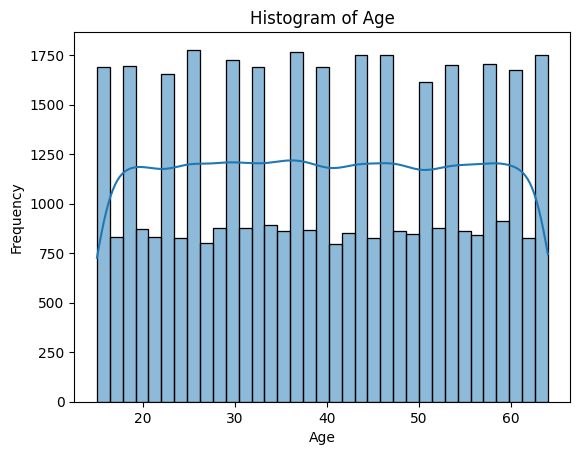

<Figure size 640x480 with 0 Axes>

In [14]:
sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.savefig('histogram_age.png')

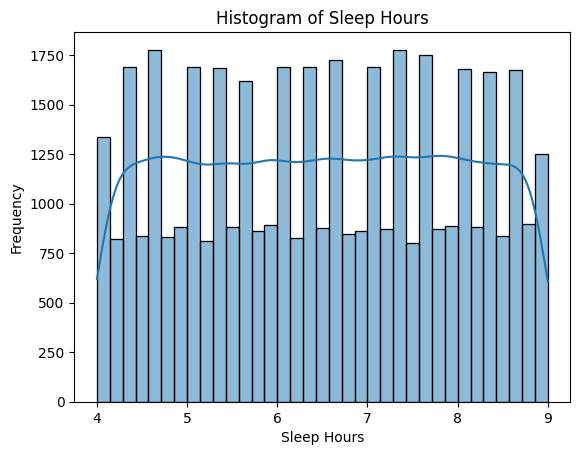

<Figure size 640x480 with 0 Axes>

In [15]:
sns.histplot(df['SleepHours'],kde=True)
plt.title("Histogram of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")
plt.show()
plt.savefig('Histogram Sleep Hours.png')

In [16]:
fig=px.pie(df, names='Gender', title='Distribution of Gender', hole=0.3,
       color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()
fig.write_image('pie_gender.png')

In [20]:
fig1=px.pie(df, names='SmokingHabits', title='Distribution of Smoking', hole=0.3,
       color_discrete_sequence=px.colors.qualitative.Pastel1)
fig1.show()
fig1.write_image('pie_smoking.png')


In [33]:
hac = df["HeartAttack"].value_counts()
fig2 = px.pie(hac, values=hac.values, names=hac.index,
              title='Distribution of Heart Attack Cases', color_discrete_sequence=px.colors.qualitative.Bold)
fig2.show()
fig2.write_image('pie_heart_attack.png')

In [35]:
fig3 = px.histogram(df, x='Age', color='HeartAttack', nbins=30, title='Age Distribution by Heart Attack Status')
fig3.show()
fig3.write_image('histogram_age_heart_attack.png')

In [56]:

fig4 = px.histogram(df, x='Gender', color='HeartAttack', barmode='group',
                    title='Gender Distribution by Heart Attack Status',
                    color_discrete_sequence=px.colors.qualitative.Prism)
fig4.show()
fig4.write_image('histogram_gender_heart_attack.png')

In [59]:
fig5 = px.box(df, x='HeartAttack', y='Cholesterol', points="all",
              title='Cholesterol Levels by Heart Attack Status', color_discrete_sequence=px.colors.qualitative.Pastel)
fig5.show()
fig5.write_image('box_cholesterol_heart_attack.png')

In [61]:
fig6 = px.histogram(df, x='SmokingHabits', color='HeartAttack', barmode='group', title='Smoking Habits by Heart Attack Status')
fig6.show()
fig6.write_image('histogram_smoking_habits_heart_attack.png')

In [66]:
fig7 = px.histogram(df, x='PhysicalActivity', color='HeartAttack', barmode='group',
                    title='Physical Activity by Heart Attack Status',color_discrete_sequence=px.colors.qualitative.Pastel)
fig7.show()
fig7.write_image('histogram_physical_activity_heart_attack.png')

In [71]:
# Interactive sunburst chart for hierarchical data
fig8 = px.sunburst(df, path=['Gender', 'SmokingHabits', 'HeartAttack'], values='Age',
                   title='Sunburst Chart: Gender, Smoking Habits, and Heart Attack')
fig8.show()
fig8.write_image('sunburst_gender_smoking_heart_attack.png')

In [73]:
# Interactive violin plot for BMI
fig9 = px.violin(df, x='HeartAttack', y='BMI', box=True, points="all", title='BMI Distribution by Heart Attack Status')
fig9.show()
fig9.write_image('violin_bmi_heart_attack.png')

In [75]:
# Interactive heatmap for stress level vs. physical activity
heatmap_data = df.groupby(['StressLevel', 'PhysicalActivity']).size().unstack()
fig10 = px.imshow(heatmap_data, labels=dict(x="Physical Activity", y="Stress Level", color="Count"),
                  title='Heatmap: Stress Level vs. Physical Activity')
fig10.show()
fig10.write_image('heatmap_stress_physical_activity.png')

In [78]:
# Interactive bar chart for occupation type
fig11 = px.histogram(df, x='OccupationType', color='HeartAttack', barmode='group',
                     title='Occupation Type by Heart Attack Status')
fig11.show()
fig11.write_image('histogram_occupation_type_heart_attack.png')

In [79]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
import plotly.figure_factory as ff

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Create an annotated heatmap using Plotly
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    colorscale='Viridis',
    annotation_text=corr_matrix.round(2).values,  # Show correlation values on the heatmap
    showscale=True
)

# Update layout for better readability
fig.update_layout(
    title='Correlation Matrix (Encoded Data)',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    width=1000,
    height=1000
)

# Show the plot
fig.show()

In [81]:
from sklearn.preprocessing import LabelEncoder

# Example: Encode 'StressLevel' column
label_encoder = LabelEncoder()
df['StressLevel_encoded'] = label_encoder.fit_transform(df['StressLevel'])

# Now you can include 'StressLevel_encoded' in the correlation matrix
corr_matrix = df[['Age', 'Cholesterol', 'BMI', 'StressLevel_encoded']].corr()

# Create an annotated heatmap using Plotly
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    colorscale='Viridis',
    annotation_text=corr_matrix.round(2).values,  # Show correlation values on the heatmap
    showscale=True
)

# Update layout for better readability
fig.update_layout(
    title='Correlation Matrix (Including Encoded Ordinal Variables)',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    width=600,
    height=600
)

# Show the plot
fig.show()